# Pi Day 2016

## Introduction: Exponential Polygons

Welcome to Pi Day 2016 in Bend, OR! This year let's do a deterministic approximation using lots of Pythagoras and no trigonometry. The basic idea is to inscribe polygons, with progressively more sides, within a unit circle. The hope is that the area of the polygons will approach the area of the circle, which is $\pi r^2 = \pi$. To illustrate:

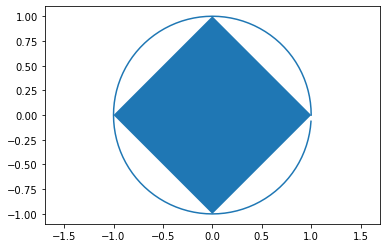

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def drawPolygon (n):
    """Draw an n-sided polygon centered at the origin."""
    theta = np.linspace (0, 2 * np.pi, n, endpoint=False)
    plt.fill (np.cos (theta), np.sin (theta))
    plt.axis ('equal')

def drawCircle (samples=100, r=1):
    """Draw a circle centered at the origin."""
    theta = np.linspace (0, 2 * np.pi, samples, endpoint=False)
    plt.plot (np.cos (theta), np.sin (theta))
    plt.axis ('equal')

drawCircle ()
drawPolygon (4)

There's a square inscribed on a circle, which leaves four caps uncovered. The area of the inscribed square is $2$, which is clearly a lousy approximation to $\pi$. More sides will surely be better. Compare the square to an octagon:

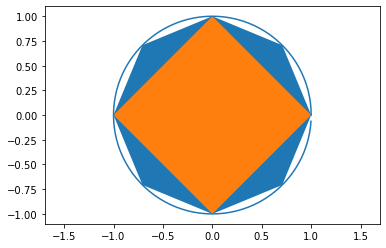

In [2]:
drawCircle ()
drawPolygon (8)
drawPolygon (4)

The blue triangles begin to fill in the difference between the inscribed square and circumscribed circle.
The area of the octagon is a bit more than 2.8, a better but still distant approximation to $\pi$.
More sides will be even better.

To the details!
## Triangles in the square
We need to know the dimensions of that square. (Why is its area=2?)
First let's split it in half to get two identical Isosceles triangles.

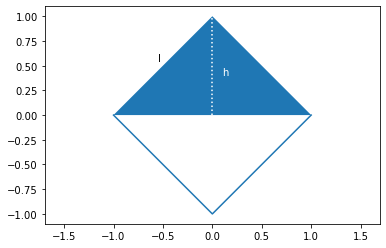

In [3]:
plt.fill ((-1, 0, 1), (0, 1, 0));
plt.text (-0.55, 0.55, 'l')
plt.plot ((0, 0), (0, 1), 'w:')
plt.text (0.1, 0.4, 'h', color='w')
plt.plot ((-1, 0, 1), (0, -1, 0))
plt.axis ('equal');

The base of that rather squashed-looking right Isosceles triangle is of length $2$.
The two legs are of length $l$, so Pythagoras tells us that:
\begin{align}
l^2 + l^2 & = 2^2 \\
l^2 & = 4 / 2 = 2 \\
l & = \sqrt{2}.
\end{align}

The height of the triangle $h=1$ by construction.
The area is:
\begin{align}
A & = b h / 2 \\
 & = 2 \cdot 1 / 2 \\
 & = 1.
\end{align}

Therefore the area of the square, composed of two triangles, is $1 + 1 = 2$.
Fortunately, that's the same as the area computed as the product of lengths of its sides: $\sqrt{2} \cdot \sqrt{2} = 2.$

Now let's cut the square again.

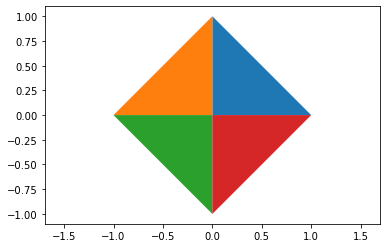

In [4]:
def polygonFromTriangles (n):
    """Draw a polygon composed of Isosceles triangles."""
    theta = 2 * np.pi / n
    for i in range (n):
        plt.fill ((0, np.cos (theta * i), np.cos (theta * (i + 1))),
                 (0, np.sin (theta * i), np.sin (theta * (i + 1))))
    plt.axis ('equal')

# Draw a square
polygonFromTriangles (4)

This decomposes the square into four Isosceles triangles.
The legs of the triangles are of length $1$, and the bases, as we have seen, are $\sqrt{2}$.

## Generalized area of an Isosceles triangle

Given an Isosceles triangle with base $b$ and legs $l$, to compute the area $A=bh/2$ we first need to find the height $h$.
As in the half-square above, the height is one leg of a right triangle with hypotenuse $l$ and other leg $b/2$; so that dear loon Pythagoras once again rides to our rescue.
\begin{align}
l^2 & = h^2 + (b/2)^2 \\
h & = \sqrt{l^2 - (b/2)^2}.
\end{align}

And thus the area:
\begin{align}
A & = b h / 2 \\
 & = {b \sqrt{l^2 - (b/2)^2} \over 2}.
\end{align}

In [5]:
def isoscelesArea (b, l):
    """Compute area of an Isosceles triangle with one side of length b and two of length l."""
    h = np.sqrt (l * l - b * b / 4)
    return b * h / 2, h

print ('Half-square area: {0:f}'.format (isoscelesArea (2, np.sqrt (2))[0]))
print ('Quarter-square area: {0:f}'.format (isoscelesArea (np.sqrt (2), 1)[0]))

Half-square area: 1.000000
Quarter-square area: 0.500000


## Area of an $n$-sided regular polygon

Every regular polygon inscribed on a circle (and, in fact, every regular polygon) has a center point, equidistant from every vertex. It's already $\Pi$ Day, so I'll prove that later if I get the time (I won't).
Thanks to that fact, we can decompose any inscribed polygon into Isosceles triangles, just as we did the square above.
The area of the polygon is the sum of the areas of the trianges.
The area of a *regular* $n$-sided polygon, then, is $n$ times the area of one of its component triangles.

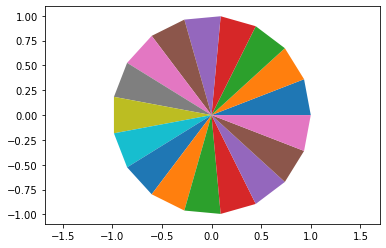

In [6]:
polygonFromTriangles (17)

One problem remains: to compute the area of an inscribed regular polygon, we need the area of its component triangles.
To compute the area of the triangles, we need the lengths of their bases.
Thanks to the special properties of right triangles, we already know the length of the bases of the triangles that compose an inscribed square is $\sqrt{2}$.
We can use that as a starting point to iteratively compute base lengths for any inscribed polygon with $2^n$ sides for $n \geq 2$.
Behold!

## Doubling an inscribed polygon

Given a regular polygon of $n$ sides inscribed on a circle, for which we know the length of a side $l_n$, we can compute $l_{2n}$, the length of a side of an inscribed regular $2n$-sided polygon.

For example, here is a square doubled to an octagon:

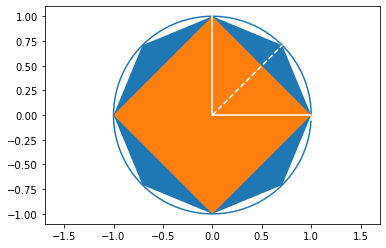

In [7]:
drawCircle ()
drawPolygon (8)
drawPolygon (4)
plt.plot ((0, 0, 1), (1, 0, 0), 'w-')
plt.plot ((0, np.cos (np.pi/4)), (0, np.sin (np.pi/4)), 'w--');

Let's take a closer look at the construction of the new Isosceles triangle, shown above with a dashed line.

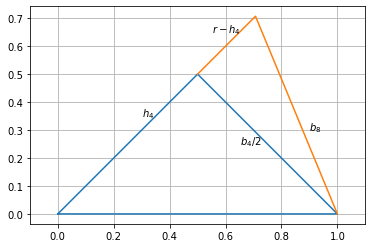

In [8]:
plt.plot ((0, 0.5, 1, 0), (0, 0.5, 0, 0))
plt.plot ((0.5, np.cos (np.pi/4), 1), (0.5, np.sin (np.pi/4), 0))
plt.axis ('equal')
plt.grid ()
plt.text (0.3, 0.35, '$h_4$')
plt.text (0.65, 0.25, '$b_4/2$')
plt.text (0.9, 0.3, '$b_8$')
plt.text (0.55, 0.65, '$r - h_4$');

That gives us all we need to compute $b_{2n}$:
\begin{align}
b_{2n}^2 & = (b_n / 2)^2 + (r - h_n)^2 \\
b_{2n} & = \sqrt{(b_n / 2)^2 + (r - h_n)^2}
\end{align}

We already know $b_n$ and $h_n$, and we've chosen $r=1$, so voila!
We have the triangles that compose the $2n$-gon.

In [9]:
def doublePolygon (b, h, r=1):
    """Given the base and height of an Isosceles component of an inscribed n-gon, compute the base of a 2n-gon."""
    leg = r - h
    return np.sqrt (b * b / 4 + leg * leg)

octobase = doublePolygon (np.sqrt (2), np.sqrt (2) / 2)
print ('Side of an octagon: {0:f}'.format (octobase))
print ('Area of an octagon: {0:f}'.format (8 * isoscelesArea (octobase, 1)[0]))

Side of an octagon: 0.765367
Area of an octagon: 2.828427


As expected, the area of an inscribed regular octagon ($2.8$) is closer to the area of the circumscribed circle than the area of an inscribed square ($2$).

## Pulling the pieces together

So here, again, is the plan:
1. Inscribe a regular polygon in a unit circle.
2. Until satisfied:
    1. Compute area $A$ of inscribed polygon.
    2. Inscribe polygon with twice as many sides.
3. Display $\hat{\pi} = A$.

In [10]:
def polyPi (n, b):
    """Compute area of n-sided regular polygon inscribed on unit circle with sides length b."""
    ia, h = isoscelesArea (b, 1)
    return n * ia, h

def polyPiLoop (n=None, epsilon=0.001):
    """Compute a polygon approximation to Pi."""

    # Start with a square
    sides = 4
    base = np.sqrt (2)
    previous = 0.0
    current, h = polyPi (sides, base)
    while current - previous > epsilon:
        previous = current
        base = doublePolygon (base, h)
        sides *= 2
        current, h = polyPi (sides, base)

    return current, sides, base

print (polyPiLoop ())
print (polyPiLoop (epsilon=1.0e-12))
print (polyPiLoop (epsilon=1.0e-30))

(3.141277250932773, 256, 0.024543076571439854)
(3.141592653589501, 8388608, 7.490140565847686e-07)
(3.141592653589795, 1073741824, 5.851672317068642e-09)


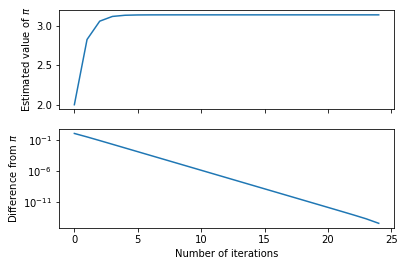

In [11]:
def convergence (n=25):
    """Return a vector of estimated values for pi at each iteration."""
    sides = 4
    base = np.sqrt (2)
    estimates = np.zeros (n, dtype=float)
    for i in range (n):
        current, h = polyPi (sides, base)
        estimates[i] = current
        base = doublePolygon (base, h)
        sides *= 2
        
    return estimates

estimates = convergence ()
f, a = plt.subplots (2, 1, sharex=True)
a[0].plot (estimates)
a[0].set_ylabel ('Estimated value of $\\pi$')
a[1].semilogy (np.pi - estimates)
a[1].set_xlabel ('Number of iterations')
a[1].set_ylabel ('Difference from $\\pi$');

After 24 iterations, the result is within $10^{-15}$ of $\pi$, which is the resolution of single-precision floating point.
Put another way: every time we go twice around the loop we get another digit of precision in our estimate. This is much better performance than [2014](https://github.com/vobine/hacks/blob/master/Pi2014.ipynb).